In [3]:
# used pgmpy conda env 

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from mi_test_func import*
from pc_alg2 import*
from pgmpy.estimators import PC  # original implementation 



def plot_graph(g, labels):
    variables = g.nodes

    plt.figure(figsize=(10,8))
    nx.draw(g, labels=labels,  with_labels=True, 
            node_color='lightgreen', edge_color='k', 
            node_size=250, connectionstyle='arc3, rad=.15')   
    plt.savefig('results.png', dpi=150)
    plt.show()
    
    
N = 5000
C = np.random.randn(N,1)   # exogenous cause of X
A = 0.8 * np.random.randn(N,1)  # backdoor adjustment variable (also cause of X)
K = A + 0.1 * np.random.randn(N,1)  # backdoor adjustment variable (cause of A and Y)
X = C - 2*A + 0.2 * np.random.randn(N,1)  # treatment variable
F = 3*X + 0.8 * np.random.randn(N,1)  # descendent of treatment variable
D = -2*X + 0.5 * np.random.randn(N,1)  # mediator between x and y
G = D + 0.5 * np.random.randn(N,1)  # descendent of mediator
Y = 2*K - D + 0.2 * np.random.randn(N,1)  # outcome variable 
H = 0.5*Y + 0.1 * np.random.randn(N,1)  # effect of Y

cols = ['C', 'A', 'K', 'X', 'F', 'D', 'G', 'H']

predictors = np.concatenate((C, A, K, X, F, D, G, H),1)
outcome =  Y[:,0]

df = pd.DataFrame(predictors)
df.columns = cols
df['Y'] = outcome
cols.append('Y')
df

   
g_answer = nx.DiGraph()
g_answer.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8])
g_answer.add_edges_from([(0, 3), (1, 3), (1, 2), (2,8), (3, 5), (3, 4), (5,6),
                             (5, 8), (8, 7)])


alpha = 0.01


''' ci_test = {'pearsonr', 'chi_square', 'mixed_mi', 'cont_mi', 'independence_match'}
'''
c = PC_adapted(df)
model = c.estimate(ci_test="mixed_mi", return_type="cpdag", significance_level=alpha, knn=10)

10


  0%|          | 0/5 [00:00<?, ?it/s]

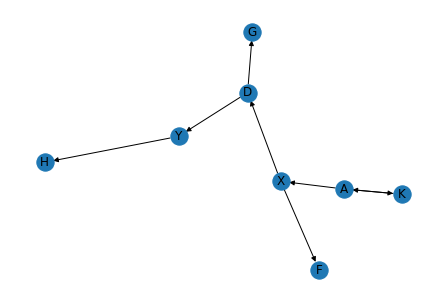

In [10]:
nx.draw(model, with_labels=True)

In [5]:
from pgmpy.estimators import PC

In [6]:
c = PC(df)

Working for n conditional variables: 5: 100%|██████████| 5/5 [00:00<00:00, 14.98it/s]


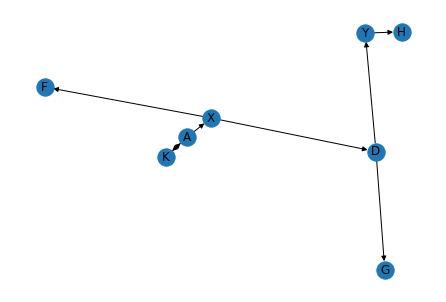

In [8]:
''' ci_test = {'pearsonr', 'chi_square', 'mixed_mi', 'cont_mi', 'independence_match'}
'''

alpha = 0.01
model = c.estimate(ci_test="pearsonr", return_type="cpdag", significance_level=alpha)
nx.draw(model, with_labels=True)